In [111]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/rebeccac/scratch/H-GASP')

import observations as obs
import frequencies as fr
from FreqState import FreqState

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Figuring out channelization_functions

### New version

In [81]:
fstate = fr.get_frequencies(1420, 1410, 1)

In [82]:
fstate.frequencies

array([1420.00243555, 1419.41696643, 1418.8314973 , 1418.24602818,
       1417.66055905, 1417.07508993, 1416.4896208 , 1415.90415168,
       1415.31868255, 1414.73321343, 1414.1477443 , 1413.56227518,
       1412.97680606, 1412.39133693, 1411.80586781, 1411.22039868,
       1410.63492956, 1410.04946043, 1409.46399131])

In [83]:
fstate.frequencies.size

19

# Getting upchannelization set up

In [104]:
U = 2
fmax = 1420
fmin = 1410

map_paths = './foregrounds.h5'
output_directory = '.'
output_filename = '/upchan_foregrounds.h5'

In [105]:
upchan = obs.Upchannelization(U,
                             fmax,
                             fmin,
                             map_paths,
                             output_directory,
                             output_filename)

In [106]:
upchan.get_R_norm()

Up-channelization matrix with shape (38, 152) saved to ./R.npy.
Normalization vector with shape (38,) saved to ./norm.npy.
Matrix frequencies with shape (38,) saved to ./freqs_matrix.npy


In [107]:
upchan.upchannelize(nside=64)

Writing file ./full_input.h5 containing the input maps ./foregrounds.h5.


# Checking if outputs make sense

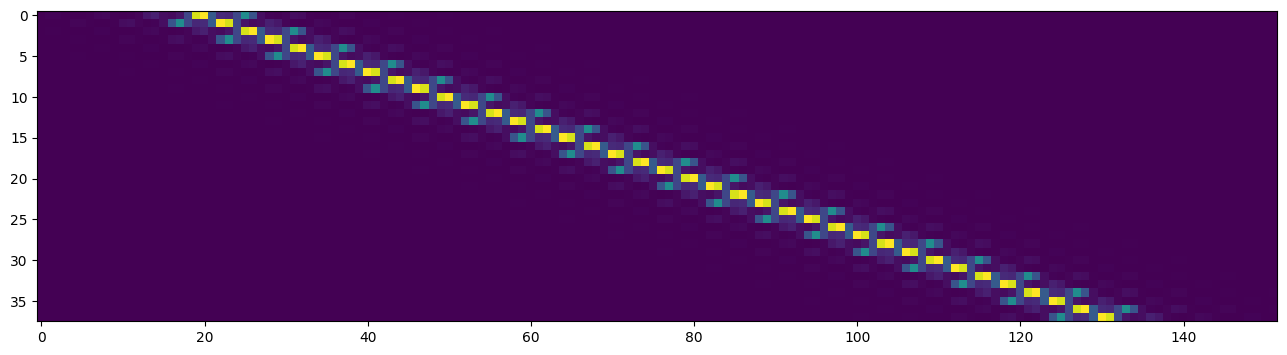

In [117]:
R = np.load('R.npy')
plt.figure(figsize=(16,10))
plt.imshow(np.abs(R)**2)
plt.show()

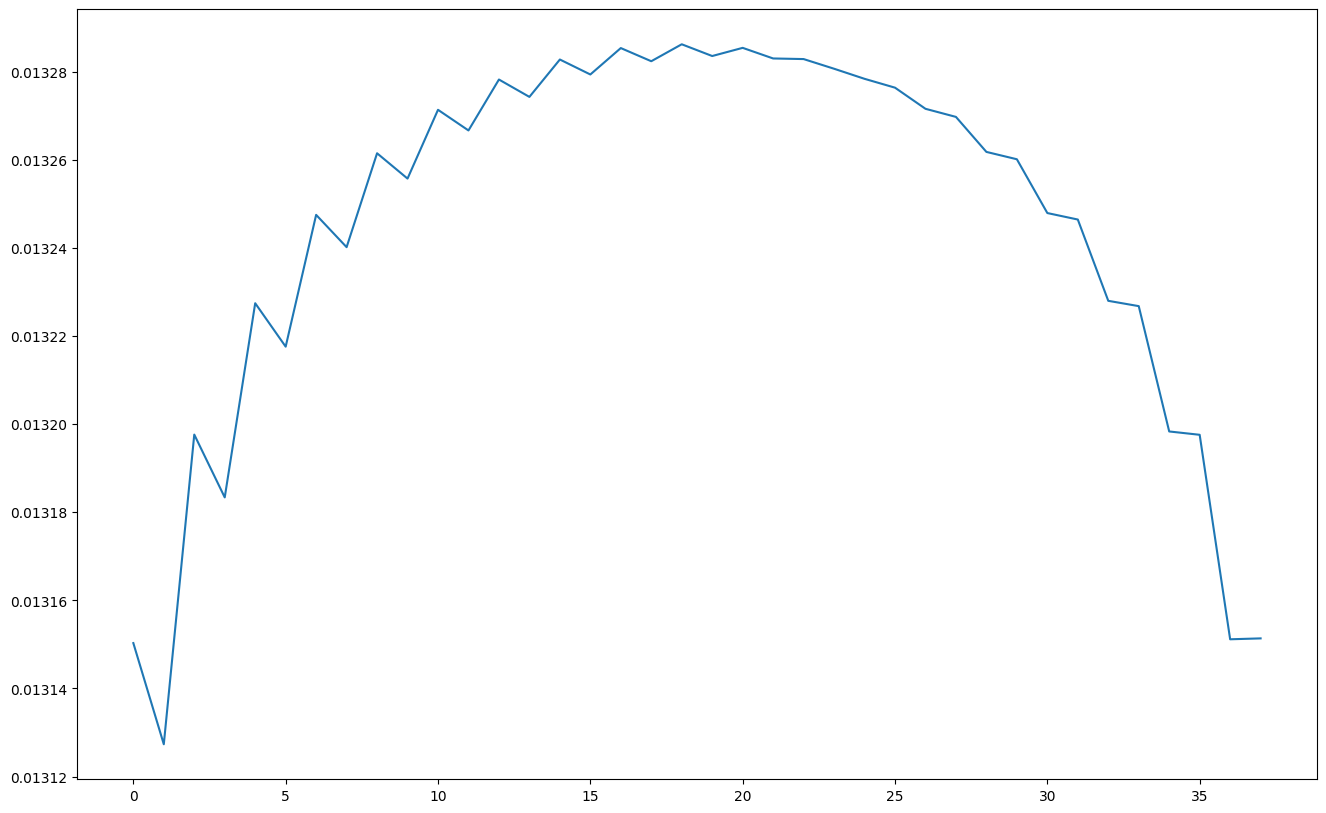

In [118]:
norm = np.load('norm.npy')
plt.figure(figsize=(16,10))
plt.plot(norm)
plt.show()

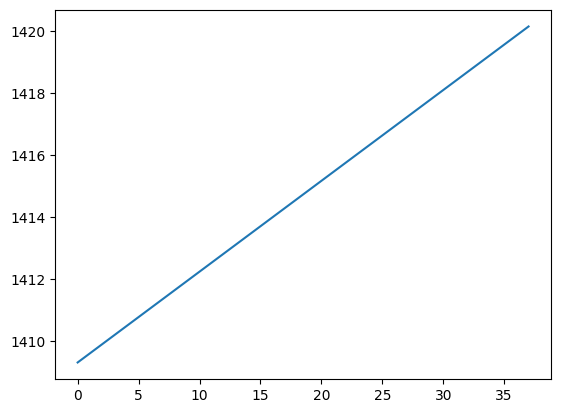

In [119]:
freqs = np.load('freqs_matrix.npy')
plt.plot(freqs)

In [120]:
1

1